In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/Data_set 2.csv'

df = pd.read_csv(file_path)
df.head()


,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

Unique Investment Reasons:
['Better Returns' 'Tax Benefits' 'Fund Diversification']

Investment Reasons Distribution:
Reason_Mutual
Better Returns          24
Fund Diversification    13
Tax Benefits             3
Name: count, dtype: int64


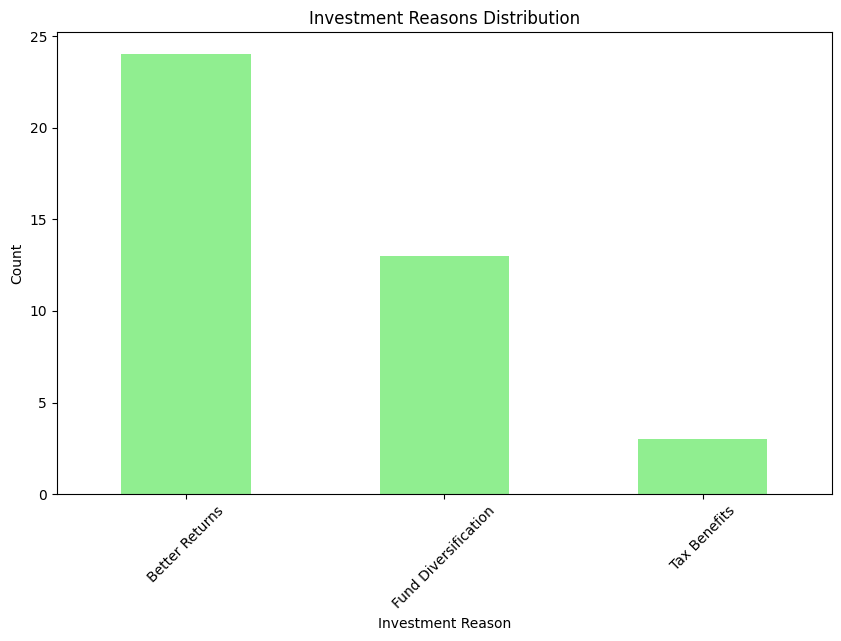

In [13]:
# Identify the reasons column (assuming it's named 'Investment_Reasons')
reasons_column = df['Reason_Mutual']

# Display the unique reasons
print("Unique Investment Reasons:")
print(reasons_column.unique())

# Count the occurrences of each reason
reasons_counts = reasons_column.value_counts()

# Display the counts
print("\nInvestment Reasons Distribution:")
print(reasons_counts)

plt.figure(figsize=(10, 6))
reasons_counts.plot(kind='bar', color='lightgreen')
plt.title('Investment Reasons Distribution')
plt.xlabel('Investment Reason')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Common Themes or Recurring Reasons:
              word  count
1           better     24
4          returns     24
2  diversification     13
3             fund     13
0         benefits      3
5              tax      3


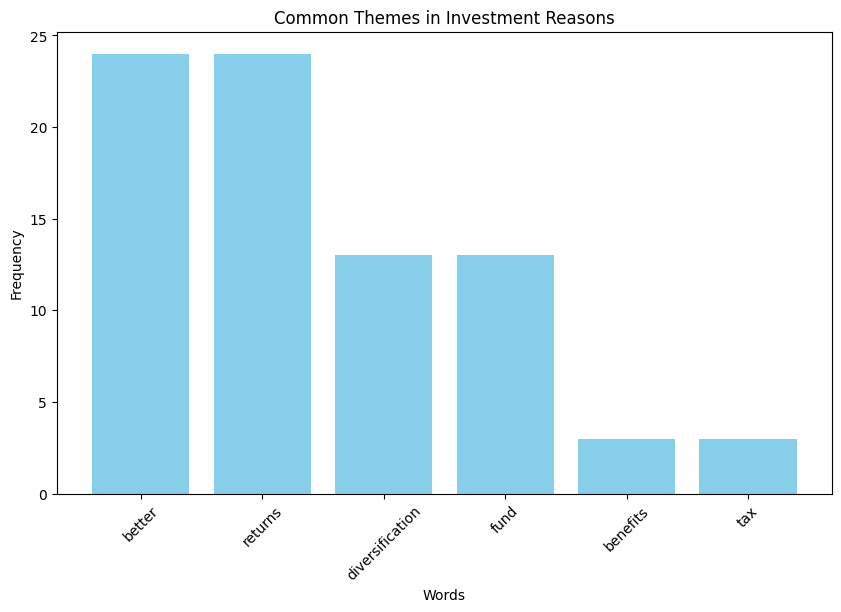

In [14]:

from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter


# Identify the reasons column (assuming it's named 'Investment_Reasons')
reasons_column = df['Reason_Mutual'].dropna()

# Tokenize and preprocess the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(reasons_column)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Sum the occurrences of each word
word_counts = X.toarray().sum(axis=0)

# Create a DataFrame with the word counts
word_freq = pd.DataFrame({'word': words, 'count': word_counts})

# Identify the most common words (themes)
common_words = word_freq.sort_values(by='count', ascending=False).head(10)

# Display the common words
print("Common Themes or Recurring Reasons:")
print(common_words)

# Visualize the common themes
plt.figure(figsize=(10, 6))
plt.bar(common_words['word'], common_words['count'], color='skyblue')
plt.title('Common Themes in Investment Reasons')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
